# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.730925e+01     1.469966e+01
 * time: 0.001455068588256836
     1     3.560357e+01     1.027677e+01
 * time: 0.005432844161987305
     2     2.762932e+01     3.939300e+00
 * time: 0.011193037033081055
     3     2.280604e+01     5.461230e+00
 * time: 0.016190052032470703
     4     2.090243e+01     2.908716e+00
 * time: 0.021170854568481445
     5     1.988995e+01     1.955765e+00
 * time: 0.050863027572631836
     6     1.966662e+01     2.445188e+00
 * time: 0.054376840591430664
     7     1.899267e+01     2.792388e+00
 * time: 0.05784106254577637
     8     1.860488e+01     2.073515e+00
 * time: 0.06121397018432617
     9     1.811970e+01     1.495492e+00
 * time: 0.06477904319763184
    10     1.781319e+01     1.401201e+00
 * time: 0.06817197799682617
    11     1.756087e+01     8.347879e-01
 * time: 0.07153105735778809
    12     1.754774e+01     1.631252e+00
 * time: 0.07422685623168945
    13     1.743895e+01     8.821782e-01
 

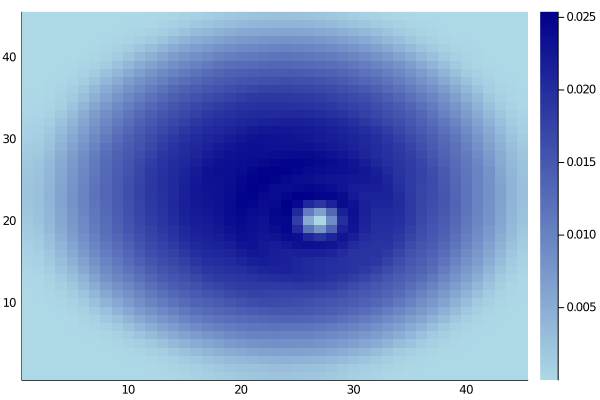

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)